In [ ]:
#set seeds for reproductibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)


Importing the dependencies


In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

Upload Kaggle.json file


In [ ]:
!pip install kaggle

In [ ]:
kaggle_credentails=json.load(open("kaggle.json"))

In [ ]:
#setup Kaggle API key as environment Variables
os.environ['KAGGLE_USERNAME']=kaggle_credentails['username']
os.environ['KAGGLE_KEY']=kaggle_credentails['key']

In [ ]:
from google.colab import files
files.upload()  # This will prompt you to upload kaggle.json


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"dhruvtalwar9198","key":"f768a26ed6908d5b165cf1e03c77c524"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!pip install -q kaggle


In [ ]:
!kaggle datasets download -d emmarex/plantdisease
!unzip plantdisease.zip


Streaming output truncated to the last 5000 lines.
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-74

In [ ]:
!ls

'kaggle (1).json'   kaggle.json   plantdisease.zip   plantvillage   PlantVillage   sample_data


In [ ]:
#unzip the downloaded dataset
with ZipFile('plantdisease.zip','r') as zip_ref:
  zip_ref.extractall()

In [ ]:
print(os.listdir("plantvillage"))

print(len(os.listdir("plantvillage/PlantVillage")))
print(os.listdir("plantvillage/PlantVillage")[:])

# print(len(os.listdir("plantvillage/color")))
# print(os.listdir("plantvillage/color")[:5])

# print(len(os.listdir("plantvillage/grayscale")))
# print(os.listdir("plantvillage/grayscale")[:5])


['PlantVillage']
15
['Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Bacterial_spot', 'Tomato_Late_blight', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_healthy', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Pepper__bell___Bacterial_spot', 'Tomato_Early_blight']


Data preprocessing

In [ ]:
#Dataset path
base_dir="plantvillage/PlantVillage"

(256, 256, 3)


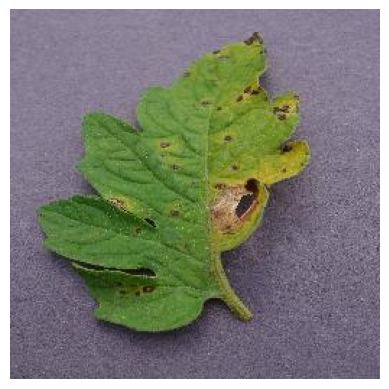

In [ ]:
img_path="/content/PlantVillage/Tomato_Septoria_leaf_spot/002533c1-722b-44e5-9d2e-91f7747b2543___Keller.St_CG 1831.JPG"

#read the image
img=mpimg.imread(img_path)
print(img.shape)
#Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
from ctypes import BigEndianStructure
#img parameters
img_size=224
batch_size=128

Train Test Split

In [ ]:
#img data generators
data_gen=ImageDataGenerator(rescale=1./255, validation_split=0.2) #using 20% for training

In [ ]:
#Train Generator
train_gen=data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 16516 images belonging to 15 classes.


In [ ]:
#validation generator
val_gen=data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 4122 images belonging to 15 classes.


cnn

In [ ]:
#model generation/definition
from keras import models, layers

model=models.Sequential()

model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(img_size,img_size,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(train_gen.num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │           1,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,928,655 (91.28 MB)

 Trainable params: 23,928,655 (91.28 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#complete the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model training


In [ ]:
#model training
history = model.fit(
    train_gen,
    epochs=12,
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
130/130 ━━━━━━━━━━━━━━━━━━━━ 53s 294ms/step - accuracy: 0.3339 - loss: 3.0048
Epoch 2/12
130/130 ━━━━━━━━━━━━━━━━━━━━ 36s 275ms/step - accuracy: 0.7696 - loss: 0.7206
Epoch 3/12
130/130 ━━━━━━━━━━━━━━━━━━━━ 36s 279ms/step - accuracy: 0.8552 - loss: 0.4416
Epoch 4/12
130/130 ━━━━━━━━━━━━━━━━━━━━ 36s 277ms/step - accuracy: 0.9270 - loss: 0.2407
Epoch 5/12
130/130 ━━━━━━━━━━━━━━━━━━━━ 36s 278ms/step - accuracy: 0.9557 - loss: 0.1498
Epoch 6/12
130/130 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - accuracy: 0.9740 - loss: 0.0881
Epoch 7/12
130/130 ━━━━━━━━━━━━━━━━━━━━ 36s 278ms/step - accuracy: 0.9873 - loss: 0.0470
Epoch 8/12
130/130 ━━━━━━━━━━━━━━━━━━━━ 37s 280ms/step - accuracy: 0.9872 - loss: 0.0476
Epoch 9/12
130/130 ━━━━━━━━━━━━━━━━━━━━ 41s 279ms/step - accuracy: 0.9986 - loss: 0.0115
Epoch 10/12
130/130 ━━━━━━━━━━━━━━━━━━━━ 36s 278ms/step - accuracy: 0.9970 - loss: 0.0132
Epoch 11/12
130/130 ━━━━━━━━━━━━━━━━━━━━ 37s 283ms/step - accuracy: 0.9996 - loss: 0.0053
Epoch 12/12
130/130

In [ ]:
#model evaluation
print("Evaluating model....")
val_loss, val_accuracy= model.evaluate(val_gen)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")

Evaluating model....
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 271ms/step - accuracy: 0.8257 - loss: 0.6615
Validation Loss: 0.6946236491203308
Validation Accuracy: 82.39%


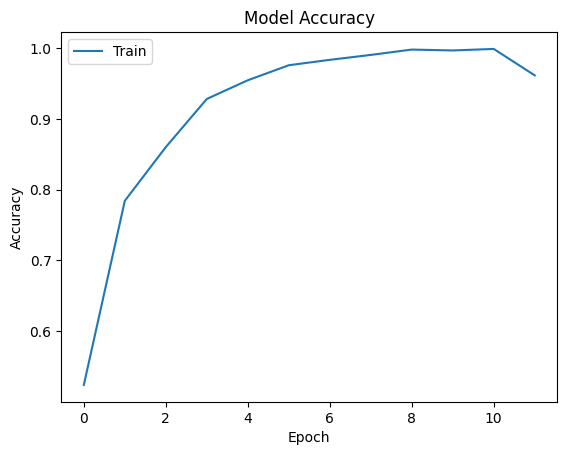

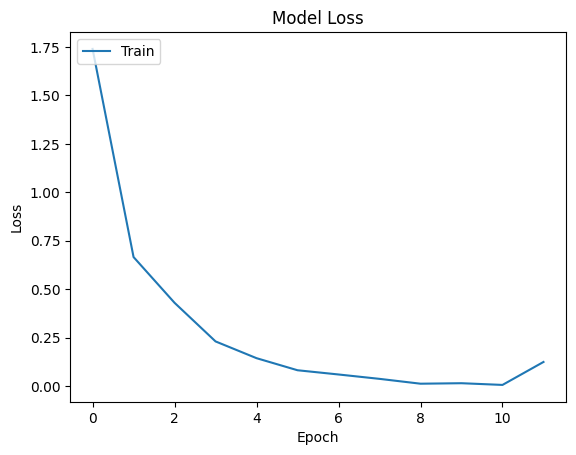

In [ ]:
#plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

#plot training and validatioon loss values
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

Building a predictive system

In [ ]:
#function to load and preprocess the image using pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
  #load the image
  img=Image.open(image_path)
  #resize it
  img=img.resize((img_size,img_size))
  #convert img into np arryay
  img_array=np.array(img)
  #add batch dimension
  img_array=np.expand_dims(img_array, axis=0)
  #scale the img values in [0,1]
  img_array=img_array.astype("float32")/255
  return img_array

#fn to predict the class of an img
def predict_img_class(model,image_path,class_indices):
  preprocessed_img=load_and_preprocess_image(image_path)
  prediction=model.predict(preprocessed_img)
  predicted_class_index=np.argmax(prediction, axis=1)[0]
  predicted_class_name=class_indices[predicted_class_index]
  return predicted_class_name


In [ ]:
#create a mapping from class indices to class names
class_indices={v: k for k,v in train_gen.class_indices.items()}

In [ ]:
#saving the class name as json file
json.dump(class_indices, open("class_indices.json","w"))

In [ ]:
#example
#w image_path='/content/plantvillage/PlantVillage/Potato___healthy/04481ca2-f94c-457e-b785-1ac05800b7ec___RS_HL 1930.JPG'
#c image_path='/content/plantvillage/PlantVillage/Pepper__bell___healthy/002f87b7-e1a5-49e5-a422-bb423630ded5___JR_HL 8068.JPG'
#c image_path="/content/plantvillage/PlantVillage/Pepper__bell___Bacterial_spot/01613cd0-d3cd-4e96-945c-a312002037bf___JR_B.Spot 3262.JPG"
#w image_path="/content/plantvillage/PlantVillage/Potato___Early_blight/00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722.JPG"
#c image_path="/content/plantvillage/PlantVillage/Potato___Late_blight/006cc01a-1888-4326-9b62-a65cb55a6377___RS_LB 5207.JPG"
#c image_path="/content/plantvillage/PlantVillage/Tomato_Bacterial_spot/00639d29-2d1a-4fcf-9bd3-a2b3109c74c4___UF.GRC_BS_Lab Leaf 1054.JPG"
#c image_path="/content/plantvillage/PlantVillage/Tomato_Early_blight/004cbe60-8ff9-4965-92df-e86694d5e9ba___RS_Erly.B 8253.JPG"
#c image_path="/content/plantvillage/PlantVillage/Tomato_Late_blight/005a2c1f-4e15-49e4-9e5c-61dc3ecf9708___RS_Late.B 5096.JPG"
#c image_path="/content/plantvillage/PlantVillage/Tomato_Leaf_Mold/0185befe-f0b5-4848-9677-f33c2237f4e9___Crnl_L.Mold 8729.JPG"
#w image_path="/content/plantvillage/PlantVillage/Tomato_Septoria_leaf_spot/009bb542-f0c0-40f2-98a7-f547c5adec45___Matt.S_CG 1355.JPG"
#c image_path="/content/plantvillage/PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite/00bc7858-1dca-4bfb-a828-225f03bd72a5___Com.G_SpM_FL 9455.JPG"
#c image_path="/content/plantvillage/PlantVillage/Tomato__Target_Spot/003a5321-0430-42dd-a38d-30ac4563f4ba___Com.G_TgS_FL 8121.JPG"
#c image_path="/content/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/004273e3-e283-4ec6-b597-d0de1bfbc590___YLCV_GCREC 2434.JPG"
#c image_path="/content/plantvillage/PlantVillage/Tomato__Tomato_mosaic_virus/006e354b-c054-4b72-a83c-e3feb038942e___PSU_CG 2330.JPG"
image_path="/content/plantvillage/PlantVillage/Tomato_healthy/000146ff-92a4-4db6-90ad-8fce2ae4fddd___GH_HL Leaf 259.1.JPG"
#image_path="/content/plantvillage/PlantVillage/Potato___Early_blight/06d9fcc9-4eea-4736-8392-5e483e2e948d___RS_Early.B 7411.JPG"
predict_class_name=predict_img_class(model,image_path,class_indices)
print(f"Predicted Class: {predict_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Class: Tomato_healthy


In [ ]:
model.save("")